# Final Project in COMP 767

This project is an implementation of the paper **Active Object Localization with Deep Reinforcement Learning** (http://slazebni.cs.illinois.edu/publications/iccv15_active.pdf).
This paper goal is do detection on the VOC 2007 dataset. To acheive it it propose an reinforcement leanring algorithm that consider each image of the dataset as an different environement for an agent that as the goal to find the thighest bounding box around object of a specific class. 
The agent uses deep reinforcement leaning to accomplish its goal.

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import torchvision.models as models

import gym_project.envs.object_localization as object_localization
from agent import Agent

## Training

In [127]:
BATCH_SIZE = 64
DISCOUNT_RATE = 0.99
EPS_START = 1.0
EPS_END = 0.1
EPS_DECAY = 5
TARGET_UPDATE = 20
NB_EPOCH = 10
MEMORY_SIZE = 10000
NB_ACTION_IN_HISTORY = 10
DETECTED_CLASS = 0

env = object_localization.ProjectEnv(detected_class = DETECTED_CLASS)
agent = Agent(env, 
              target_update=TARGET_UPDATE, 
              discout_rate=DISCOUNT_RATE,
              eps_start=EPS_START, 
              eps_end=EPS_END, 
              eps_decay=EPS_DECAY,
              batch_size=BATCH_SIZE, 
              memory_size=MEMORY_SIZE, 
              n_past_action_to_remember=NB_ACTION_IN_HISTORY)
# lenghts = agent.train(env)
# print(lenghts)

Environement initializatione done for class : aeroplane
Agent initialization done


In [128]:
base_model_root = "/home/jg/MILA/COMP767-Reinforcement_Learning/COMP767/project/best_q_net"
model_root = base_model_root + "/detected_class=0_3/best_policy_q_net.pt"
agent.load_model(model_root)

In [109]:
print(len(env.detected_class_indexes))

238


## Testing

Timesteps :5
Action : reset, Reward : 0, IoU : 0.4225054945054945


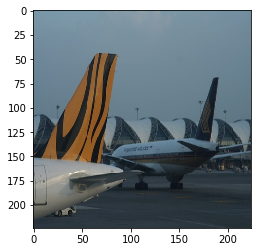

Action : trigger, Reward : -10, IoU : 0.316198224852071


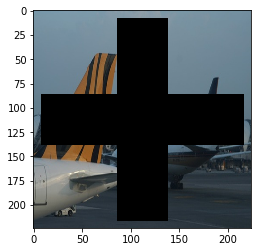

Action : smaller, Reward : 1, IoU : 0.5242122634211748


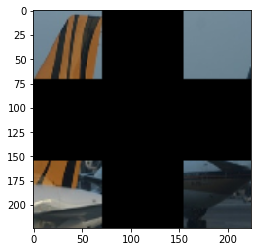

Action : smaller, Reward : -1, IoU : 0.3763440860215054


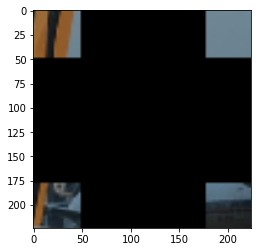

Action : smaller, Reward : -1, IoU : 0.15467836257309941


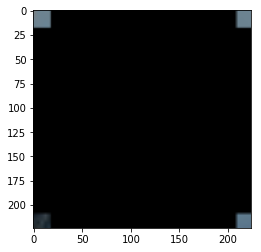

Action : trigger, Reward : -10, IoU : 0.15467836257309941


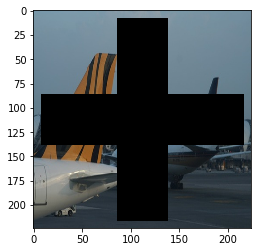

In [134]:
imgs, actions, rewards, ious, t = agent.test_episode(env)
print(f"Timesteps :{t}")
for img, action, reward, iou in zip(imgs, actions, rewards, ious):
    print(f"Action : {action}, Reward : {reward}, IoU : {iou}")
    plt.imshow(img)
    plt.show()